In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Defining birth and death rates

Setting $T_{max}=25/k_d$ as we know the system decays with a timescale proportional to $\frac{1}{k_d}$

In [2]:
k_b=10
k_d=1
T_max = 25/k_d

In [3]:
dt = .01;
gap = 30
mu = [0]
nreps = 1000
sigma_squared = [0]

for i in range(int(T_max/(gap*dt))):
    mu.append(0)
    sigma_squared.append(0)

for i in range(nreps):
    x=0
    t=0
    j=0
    X = [0]
    T = [0]
    
    while t<T_max:
        r1,r2=np.random.rand(1,2).flatten().tolist()
        k0 = k_b+k_d*x
        
        i = int(t/dt)
            
        t_react = -np.log(r1)/k0
        t = t+t_react
        
        while i<np.min([int(t/dt),int(T_max/dt)]):
            if i%gap==0:
                mu[j] = mu[j]+x
                sigma_squared[j] = sigma_squared[j]+x*x
                j=j+1
            i = i+1
        
        if r2>k_b/k0:
            x = x-1
        else:
            x=x+1
            
        X.append(x)
        T.append(t)
            
for i in range(len(mu)):
    mu[i] = mu[i]/nreps
    sigma_squared[i] = sigma_squared[i]/nreps - (mu[i])**2

mu = np.array(mu)
sigma = np.sqrt(sigma_squared)

As seen in the class for the birth-death process, average population goes as:

$$\left< x(t) \right> = \frac{k_b}{k_d}(1-e^{-k_d t}) $$

In [4]:
def theor(t):
    return((k_b/k_d)*(1-np.exp(-k_d*t)))

Plotting $\langle x \rangle$ and $\sigma^2$ and showing that both of them go as $\Lambda(t) = \frac{k_b}{k_d}(1-e^{-k_d t}) $

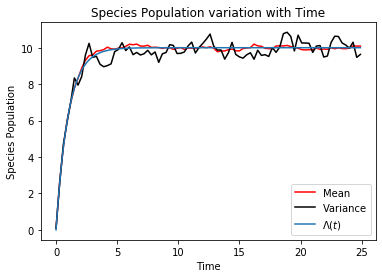

In [5]:
plt.plot(np.arange(0,T_max,gap*dt),np.array(mu),color='r',label='Mean')
plt.plot(np.arange(0,T_max,gap*dt),np.array(sigma_squared),color='k',label='Variance')
plt.plot(np.arange(0,T_max,.1),theor(np.arange(0,T_max,.1)),label='$\Lambda(t)$')
plt.ylabel('Species Population')
plt.xlabel('Time')
plt.title('Species Population variation with Time')
plt.legend()

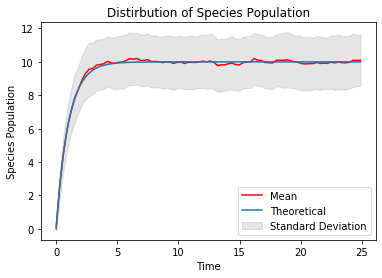

In [6]:
plt.plot(np.arange(0,T_max,gap*dt),np.array(mu),color='r',label='Mean')
plt.fill_between(np.arange(0,T_max,gap*dt),
                 np.array(mu)-sigma/2,
                 np.array(mu)+sigma/2,
                 color='k',alpha=.1,Label = "Standard Deviation")
plt.plot(np.arange(0,T_max,.1),theor(np.arange(0,T_max,.1)),label='Theoretical')
plt.ylabel('Species Population')
plt.xlabel('Time')
plt.title('Distirbution of Species Population')
plt.legend()